<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 2) Use Spacy to tokenize / clean the listings 

In [3]:
nlp = spacy.load("en_core_web_lg")

In [28]:
def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
            
    return lemmas

In [47]:
df = pd.read_csv('./data/job_listings.csv', index_col=0)

# Lower case title and description to make it easier to search
df['title'] = df['title'].apply(lambda x: x.lower())
df['description'] = df['description'].apply(lambda x: x.lower())
# Check if data scientist is in the title
df['ds_title'] = df['title'].str.contains('data scientist')
df = df[df['ds_title']==True]
print(df.shape)
df.head()

(406, 3)


,description,title,ds_title
0,"b""<div><div>job requirements:</div><ul><li><p>...",data scientist,True
1,b'<div>job description<br/>\n<br/>\n<p>as a da...,data scientist i,True
2,b'<div><p>as a data scientist you will be work...,data scientist - entry level,True
3,"b'<div class=""jobsearch-jobmetadataheader icl-...",data scientist,True
4,b'<ul><li>location: usa \xe2\x80\x93 multiple ...,data scientist,True


In [48]:
df['tokens'] = df['description'].apply(get_lemmas)

In [49]:
print(ds_df.shape)
ds_df.head()

(406, 4)


,description,title,ds_title,tokens
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",data scientist,True,"[b""<div><div, >, Job, requirements:</div><ul><..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,data scientist i,True,"[b'<div, >, job, description, <, br/>\n, <, br..."
2,b'<div><p>As a Data Scientist you will be work...,data scientist - entry level,True,"[b'<div><p, >, Data, scientist, work, consult,..."
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",data scientist,True,"[b'<div, class=""jobsearch, jobmetadatahead, ic..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,data scientist,True,"[b'<ul><li, >, location, USA, \xe2\x80\x93, mu..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [55]:
df['description'].values.tolist()[1]

'b\'<div>job description<br/>\\n<br/>\\n<p>as a data scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. you will do so by empowering and improving the next generation of accolade applications and user experiences.</p><p><b>\\na day in the life\\xe2\\x80\\xa6</b></p><ul><li>\\nwork with a small agile team to design and develop mobile applications in an iterative fashion.</li><li>\\nwork with a tight-knit group of development team members in seattle.</li><li>\\ncontribute to best practices and help guide the future of our applications.</li><li>\\noperates effectively as a collaborative member of the development team.</li><li>\\noperates effectively as an individual for quick turnaround of enhancements and fixes.</li><li>\\nresponsible for meeting expectations and deliverables on time with high quality.</li><li>\\ndrive and implement new features within our mobile applications.</li><li>\\np

In [56]:
data = df['description'].values.tolist()

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer

vect = CountVectorizer(stop_words='english', min_df = 0.05, max_df= 0.90)
vect.fit(data)

sparse_dtm = vect.transform(data)

dtm = pd.DataFrame(sparse_dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,x99re,x99s,x99t,x9d,xa6,xe2,xs,year,years,york
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,2,0,0,2,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## 4) Visualize the most common word counts

In [50]:
from collections import Counter

def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    total = wc['count'].sum()
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    total_docs = len(docs)
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [51]:
wc = count(df['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
168,<,373,5996,1.0,0.042084,0.042084,0.918719
67,>,398,5579,2.0,0.039157,0.081242,0.980296
77,datum,396,3011,3.0,0.021133,0.102375,0.975369
528,li,143,1976,4.0,0.013869,0.116244,0.352217
7,work,358,1389,5.0,0.009749,0.125993,0.881773
53,experience,371,1362,6.0,0.009560,0.135553,0.913793
110,team,343,1122,7.0,0.007875,0.143428,0.844828
165,business,302,1071,8.0,0.007517,0.150945,0.743842
328,data,331,884,9.0,0.006205,0.157149,0.815271
74,science,316,865,10.0,0.006071,0.163220,0.778325


In [52]:
new_wc = wc.drop([168 , 67, 528])
new_wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
77,datum,396,3011,3.0,0.021133,0.102375,0.975369
7,work,358,1389,5.0,0.009749,0.125993,0.881773
53,experience,371,1362,6.0,0.009560,0.135553,0.913793
110,team,343,1122,7.0,0.007875,0.143428,0.844828
165,business,302,1071,8.0,0.007517,0.150945,0.743842
328,data,331,884,9.0,0.006205,0.157149,0.815271
74,science,316,865,10.0,0.006071,0.163220,0.778325
235,product,259,776,11.0,0.005447,0.168667,0.637931
519,analytic,237,724,12.0,0.005082,0.173749,0.583744
60,model,259,702,13.0,0.004927,0.178676,0.637931


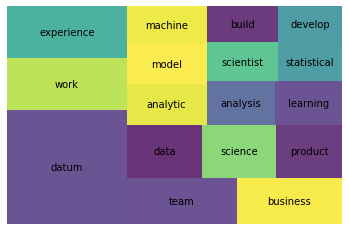

In [54]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = new_wc[new_wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')

# Create a vocabulary and get word counts per document
sparse = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,02115,03,0356,04,057,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.094472,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [59]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [62]:
ideal_desc = ["""Strategically collecting and analyzing newly created data for building product analytics."""]

In [63]:
# Query for Sim of Random doc to job listing
new = tfidf.transform(ideal_desc)

nn.kneighbors(new.todense())

(array([[1.35938503, 1.36464576, 1.36709421, 1.37142405, 1.37142405]]),
 array([[134,  80, 202, 227, 261]], dtype=int64))

In [64]:
# Inspect Most relevant result
data[227]

'b"<b>minimum qualifications:</b><br/>\\nmaster\'s degree in operations research, industrial engineering, statistics, related field, or equivalent practical experience.\\n<br/>2 years of relevant work experience (e.g., as a data scientist) or equivalent. analytical engagements outside class work while at school can be included.\\n<br/><br/>\\nexperience with statistical software (e.g., r, python) and database languages (e.g., sql)\\n<br/><br/>\\n<b>preferred qualifications:</b><br/>\\nphd in operations research, industrial engineering, statistics or related field.\\n<br/><br/>\\n4 years of relevant work experience (e.g., as a data scientist), including experience applying advanced analytics to planning and infrastructure problems.\\n<br/><br/>\\nexperience designing and building statistical forecasting models.\\n<br/><br/>\\nexperience designing and building machine learning models.\\n<br/><br/>\\nexcellent problem-framing, problem-solving and project management skills.\\n<br/><br/>\\n

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 